# Example Analysis 1
This notebook will serve as a tutorial on how to use the functions found in `helper_functions/analysis_functions`. We will walk through a 25 round simulation. I will show the configuration of the simulation at the end of the file.

Let's first import what we need and load our data. 

In [1]:
import pandas as pd
import os
os.chdir(r'C:\Users\Justin Tse\Documents\EvolutionSim') # Replace this with a local call
from helper_functions.analysis_functions import plot_traits, plot_population, plot_survival, name_key, get_dist_plot, get_joyplot

In [2]:
dt = pd.read_csv('logs/example_1.csv')

## Overall Population Statistics

Let's first look at a population summary of the simulation. 

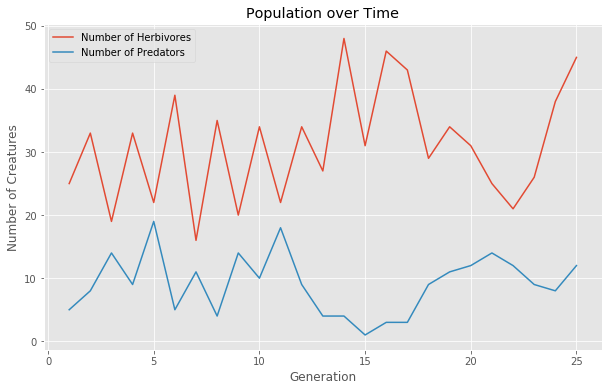

In [3]:
plot_population(dt)

The population of both types of creatures stays roughly constant throughout the generations. Note that the predators were close to going extinct in round 15, fortunately the population recovered. Although values of food are slightly randomized, the number of food of each type stays constant in each generation. 

Let's look at the survival statistics of each type of creature throughout the simulation.

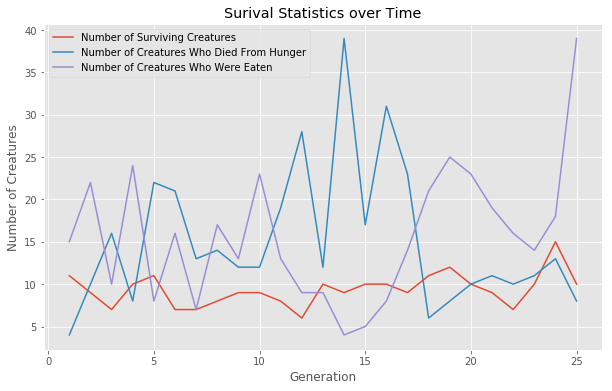

In [4]:
plot_survival(dt)

Fill this in  

## Trait Analysis

Let's now take a deeper look at traits over time for the Herbivores. 

We can use the `plot_traits()` function to look at the evolution of traits over time. The list of traits that we can look at is `birth_vel_max`, `birth_acc_max`, `birth_jerk`, `max_size`, `birth_width`, `attack`, `defense` and `num_offspring_divisor`. Let's look at the speed and size traits over time. 

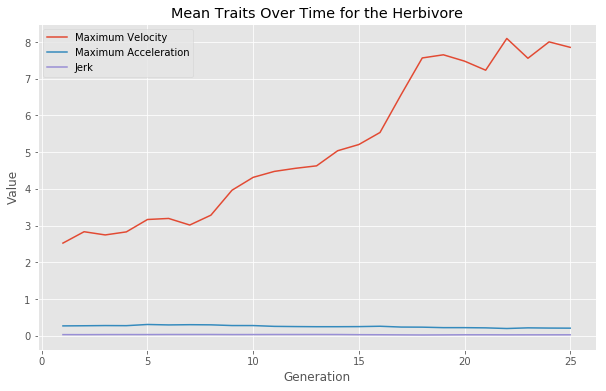

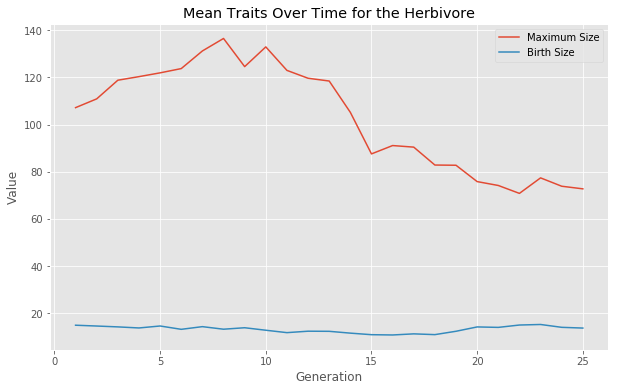

In [5]:
plot_traits(dt, ['birth_vel_max', 'birth_acc_max', 'birth_jerk'], 'searcher')
plot_traits(dt, ['max_size', 'birth_width'], 'searcher')

It seems that the herbivores evolved to have a much higher maximum velocity while acceleration and jerk stayed relatively constant. For size, I would guess that herbivores evolved to have lower maximum size because they then have to consume less food to survive and produce offspring. 

If we wanted to look at predator traits, we can change the call slightly. Let's look at predator's `attack` and `defense` over time. 

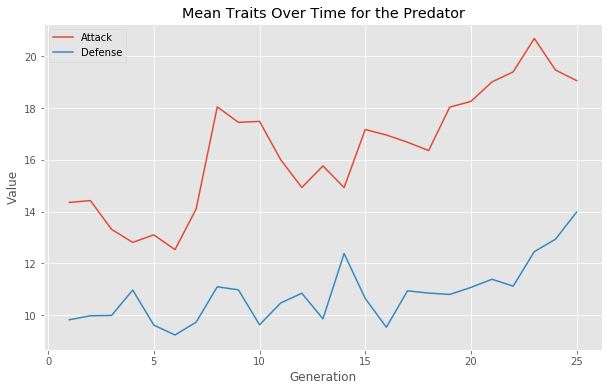

In [6]:
plot_traits(dt, ['attack', 'defense'], 'predator')

Predator attack increased over time which is expected. However, their defense also increased slightly which is unexpected as defense provides no benefit to the predator with this config. It would be interesting to run the simulation a few more times to see if this is a common trend. 

## Trait Distributions Over Time
If we want to take a look at the distribution of trait values in a generation, we can use the `get_dist_plot()` function. 

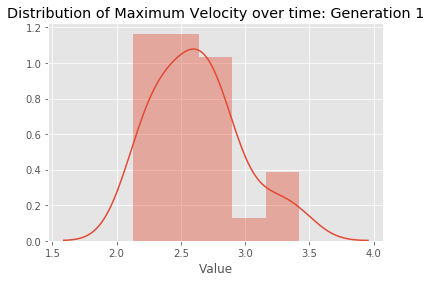

In [7]:
get_dist_plot(dt, 'birth_vel_max', generation=1)

If we wanted to take a look at the distribution of trait values over time we could use the `get_joyplot()` function. 

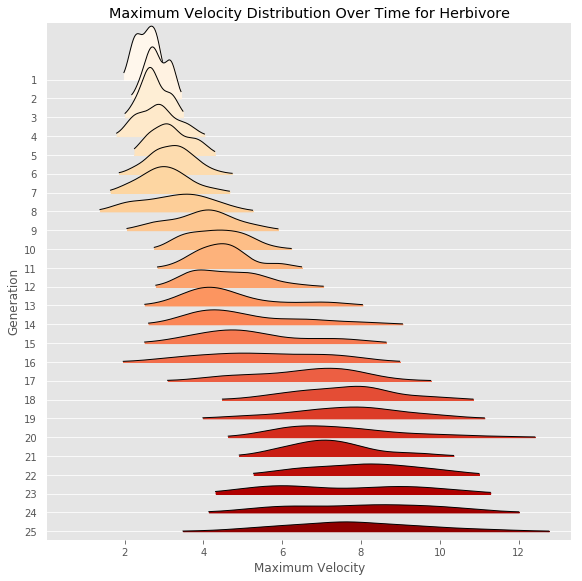

In [8]:
get_joyplot(dt, 'birth_vel_max', 'searcher')

We can also add a restriction to different statuses: `alive`, `dead`, `eaten`.

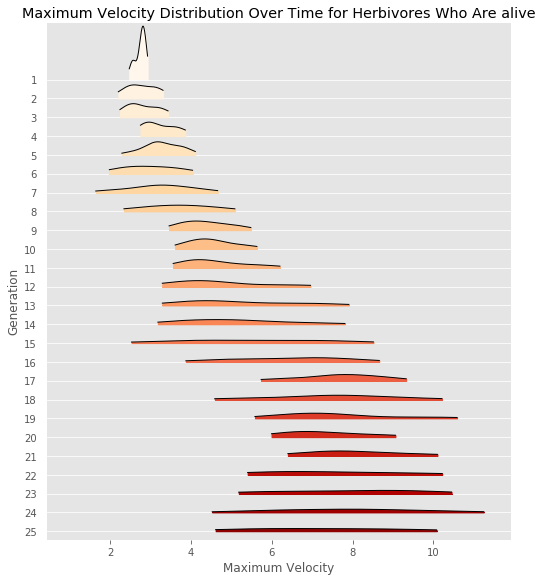

In [9]:
get_joyplot(dt, 'birth_vel_max', 'searcher', 'alive')

## Config

This is the configuration used to seed this simulation.

In [10]:
num_tomato = 40
num_pumpkin = 15
num_grape = 20
num_basic_searching_herbivores = 25
num_predator = 5

predators_can_eat_each_other = False

# Base Creature parameters for round 1
base_max_size = 110
base_size = 15
base_defense = 10
base_attack = 15
base_jerk = .03
base_acc_max = .27
base_vel_max = 2.5
base_search_distance = 300
base_num_offspring_divisor = 15

base_predator_max_size = 80
base_predator_size = 15
base_predator_defense = 10
base_predator_attack = 15
base_predator_jerk = .033
base_predator_acc_max = .33
base_predator_vel_max = 3.0
base_predator_search_distance = 400
base_predator_num_offspring_divisor = 25

# The lower bound of mutation when passing traits
round_trait_decrease_percent = .85
# The upper bound of mutation when passing traits
round_trait_increase_percent = 1.15